# Perform EDA on Salary Data.

In [1]:
from scipy.stats import skew
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1


### Q. 1) Show me the function for choosing the columns that will be utilized during Exploratory Data Analysis?

In [3]:
df = pd.read_csv('salary_data_cleaned.csv',usecols=
                 ['Job Title',
          'Company Name',
               'Rating',
          'Headquarters',
          'Size',
          'Sector',
          'Revenue',
          'avg_salary',
              'python_yn',
               'R_yn',
               'spark',
              'aws',
              'excel'])
df.head(1)

,Job Title,Rating,Company Name,Headquarters,Size,Sector,Revenue,avg_salary,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research\n3.8,"Goleta, CA",501 to 1000 employees,Aerospace & Defense,$50 to $100 million (USD),72.0,1,0,0,0,1


### Q. 2) What are the ways to decrease the data types in order to save memory?

In [4]:
for i in df.columns:
    if 'int64' in str(df[i].dtype):
        if df[i].max() <= 1:
            df[i] = df[i].astype('int8')
    elif 'float64' in str(df[i].dtype):
        df[i] = df[i].astype('float16')

In [5]:
df.dtypes

Job Title        object
Rating          float16
Company Name     object
Headquarters     object
Size             object
Sector           object
Revenue          object
avg_salary      float16
python_yn          int8
R_yn               int8
spark              int8
aws                int8
excel              int8
dtype: object

In [6]:
df.head(1)

,Job Title,Rating,Company Name,Headquarters,Size,Sector,Revenue,avg_salary,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.800781,Tecolote Research\n3.8,"Goleta, CA",501 to 1000 employees,Aerospace & Defense,$50 to $100 million (USD),72.0,1,0,0,0,1


### Q. 3) What methods can be used to clean the data in the column and extract the useful information from that column?

### Cleaning the size column and extracting only maximum number of employees from that company

In [7]:
def Clean_Size1(x):
    l = []
    for i in x:
        if i.split()[-1] == 'employees':
            if len(i.split()[-2].split('+'))>1:
                l.append(i.split()[-2].split('+')[0])
            else:
                l.append(i.split()[-2])
        else:
            l.append(np.nan)
    return l

In [8]:
def Clean_Size2(i):
    if i.split()[-1] == 'employees':
        if len(i.split()[-2].split('+'))>1:
            return int(i.split()[-2].split('+')[0])
        else:
            return int(i.split()[-2])
    else:
        return np.nan

I have created two functions, Clean_Size1 and Clean_Size2. The first function takes a column as input and returns a list containing the maximum employee count for the company, while the second function cleans individual values of the size column and returns the maximum employee count on each iteration.

### Using first function (Clean_Size1)

In [9]:
df.Size = Clean_Size1(df.Size)

In [10]:
df.head(1)

,Job Title,Rating,Company Name,Headquarters,Size,Sector,Revenue,avg_salary,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.800781,Tecolote Research\n3.8,"Goleta, CA",1000,Aerospace & Defense,$50 to $100 million (USD),72.0,1,0,0,0,1


In [11]:
df = pd.read_csv('salary_data_cleaned.csv',usecols=
                 ['Job Title',
          'Company Name',
               'Rating',
          'Headquarters',
          'Size',
          'Sector',
          'Revenue',
          'avg_salary',
              'python_yn',
               'R_yn',
               'spark',
              'aws',
              'excel'])
df.head(1)

,Job Title,Rating,Company Name,Headquarters,Size,Sector,Revenue,avg_salary,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research\n3.8,"Goleta, CA",501 to 1000 employees,Aerospace & Defense,$50 to $100 million (USD),72.0,1,0,0,0,1


### Using second function (Clean_Size2)

In [12]:
df.Size = df.Size.apply(lambda x: Clean_Size2(x))

In [13]:
df.head(1)

,Job Title,Rating,Company Name,Headquarters,Size,Sector,Revenue,avg_salary,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research\n3.8,"Goleta, CA",1000.0,Aerospace & Defense,$50 to $100 million (USD),72.0,1,0,0,0,1


### Clean the Company Name column

In [14]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

In [15]:
df.head(3)

,Job Title,Rating,Company Name,Headquarters,Size,Sector,Revenue,avg_salary,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research,"Goleta, CA",1000.0,Aerospace & Defense,$50 to $100 million (USD),72.0,1,0,0,0,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System,"Baltimore, MD",10000.0,Health Care,$2 to $5 billion (USD),87.5,1,0,0,0,0
2,Data Scientist,4.8,KnowBe4,"Clearwater, FL",1000.0,Business Services,$100 to $500 million (USD),85.0,1,0,1,0,1


### Clean the Revenue column and extract maximum revenue generated by the company and convert billions to million

In [16]:
import re

In [17]:
re.findall(r'(billion | million)', 'billion and million')

['billion ', ' million']

In [18]:
df.Revenue[:20]

0            $50 to $100 million (USD)
1               $2 to $5 billion (USD)
2           $100 to $500 million (USD)
3     $500 million to $1 billion (USD)
4             Unknown / Non-Applicable
5               $1 to $2 billion (USD)
6             Unknown / Non-Applicable
7             $25 to $50 million (USD)
8     $500 million to $1 billion (USD)
9           $100 to $500 million (USD)
10              $1 to $2 billion (USD)
11              $1 to $2 billion (USD)
12                  $10+ billion (USD)
13            Unknown / Non-Applicable
14                  $10+ billion (USD)
15            Unknown / Non-Applicable
16              $1 to $5 million (USD)
17            Unknown / Non-Applicable
18            Unknown / Non-Applicable
19    $500 million to $1 billion (USD)
Name: Revenue, dtype: object

In [19]:
def Clean_revenue(i):
    if re.findall(r'(billion | million)', i):
        if re.search(r'billion',i):
            return int(i.split()[-3].split('+')[0].split('$')[-1])*1000
        else:
            return int(i.split()[-3].split('+')[0].split('$')[-1])
    else:
        return np.nan

In [20]:
df.Revenue = df.Revenue.apply(lambda x: Clean_revenue(x))

In [21]:
df.head(3)

,Job Title,Rating,Company Name,Headquarters,Size,Sector,Revenue,avg_salary,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research,"Goleta, CA",1000.0,Aerospace & Defense,100.0,72.0,1,0,0,0,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System,"Baltimore, MD",10000.0,Health Care,5000.0,87.5,1,0,0,0,0
2,Data Scientist,4.8,KnowBe4,"Clearwater, FL",1000.0,Business Services,500.0,85.0,1,0,1,0,1


In [22]:
def clean_headquarters(i):
    return i.split(',')[0]

In [23]:
df.Headquarters = df.Headquarters.apply(lambda x: clean_headquarters(x))

In [24]:
df.head(3)

,Job Title,Rating,Company Name,Headquarters,Size,Sector,Revenue,avg_salary,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research,Goleta,1000.0,Aerospace & Defense,100.0,72.0,1,0,0,0,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System,Baltimore,10000.0,Health Care,5000.0,87.5,1,0,0,0,0
2,Data Scientist,4.8,KnowBe4,Clearwater,1000.0,Business Services,500.0,85.0,1,0,1,0,1


### Check for null values in the dataframe

In [25]:
df.isnull().sum()

Job Title         0
Rating            0
Company Name      0
Headquarters      0
Size             10
Sector            0
Revenue         204
avg_salary        0
python_yn         0
R_yn              0
spark             0
aws               0
excel             0
dtype: int64

### Droped the duplicate records using drop_duplicate function

In [26]:
df.drop_duplicates(inplace=True)

### Droped the duplicate records using dropna function

In [27]:
df.dropna(inplace=True)

### type casting size, revenue, avg_salary columns to int16

In [28]:
df.Size = df.Size.astype('int16')

In [29]:
df.Revenue = df.Revenue.astype('int16')

In [30]:
df.avg_salary = df.avg_salary.astype('int16')

### Renamed the columns

In [31]:
# Renaming the columns
df.rename(columns={'Job Title': 'Job_Title',
                    'Company Name': 'Company_Name',
                    'avg_salary': 'Estimated_Avg_Salary(In 1000k)',
                        'Size': 'Company_Size(max. 10000)',
                        'Sector': 'Industry',
                         'R_yn':'R',
                         'python_yn':'Python',
                         'excel': 'Excel',
                         'spark': 'Spark',
                         'aws': 'AWS',
                         'Revenue': 'Revenue(In mil)'
                        },inplace=True)

In [32]:
df.drop(692,inplace=True)

### Saved the modified dataframe file into csv

In [33]:
df.to_csv('Job_Info.csv',index=False)

In [34]:
job_info = pd.read_csv('Job_Info.csv')
job_info.head()

,Job_Title,Rating,Company_Name,Headquarters,Company_Size(max. 10000),Industry,Revenue(In mil),Estimated_Avg_Salary(In 1000k),Python,R,Spark,AWS,Excel
0,Data Scientist,3.8,Tecolote Research,Goleta,1000,Aerospace & Defense,100,72,1,0,0,0,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System,Baltimore,10000,Health Care,5000,87,1,0,0,0,0
2,Data Scientist,4.8,KnowBe4,Clearwater,1000,Business Services,500,85,1,0,1,0,1
3,Data Scientist,3.8,PNNL,Richland,5000,"Oil, Gas, Energy & Utilities",1000,76,1,0,0,0,0
4,Data Scientist,3.4,CyrusOne,Dallas,500,Real Estate,2000,95,1,0,0,1,1


### Q. 4) Using Python, R, Spark, AWS, Excel columns to create column name Required skills?

In [35]:
def convert(x,v):
    if x == 0:
        x = ''
    else:
        x = v
    return x

In [36]:
P = job_info.Python.apply(lambda x: convert(x,'Python'))
R = job_info.R.apply(lambda x: convert(x,'R'))
S = job_info.Spark.apply(lambda x: convert(x,'Spark'))
A = job_info.AWS.apply(lambda x: convert(x,'AWS'))
E = job_info.Excel.apply(lambda x: convert(x,'Excel'))

In [37]:
job_info['Required_Skills'] = P + ' ' + R + ' ' + S + ' ' + A + ' ' + E
job_info.drop(columns=['Python','R','Spark','AWS','Excel'],inplace=True)
job_info

,Job_Title,Rating,Company_Name,Headquarters,Company_Size(max. 10000),Industry,Revenue(In mil),Estimated_Avg_Salary(In 1000k),Required_Skills
0,Data Scientist,3.8,Tecolote Research,Goleta,1000,Aerospace & Defense,100,72,Python Excel
1,Healthcare Data Scientist,3.4,University of Maryland Medical System,Baltimore,10000,Health Care,5000,87,Python
2,Data Scientist,4.8,KnowBe4,Clearwater,1000,Business Services,500,85,Python Spark Excel
3,Data Scientist,3.8,PNNL,Richland,5000,"Oil, Gas, Energy & Utilities",1000,76,Python
4,Data Scientist,3.4,CyrusOne,Dallas,500,Real Estate,2000,95,Python AWS Excel
...,...,...,...,...,...,...,...,...,...
327,Data Scientist,4.3,Solugenix Corporation,Brea,500,Information Technology,100,69,Python Excel
328,Data Scientist (Warehouse Automation),3.8,SoftBank Robotics,Paris,500,Manufacturing,50,103,Python AWS
329,Data Architect / Data Modeler,4.3,Medidata Solutions,New York,5000,Information Technology,1000,86,AWS Excel
330,Data Scientist,3.4,"DatamanUSA, LLC",Centennial,200,Information Technology,10,89,


In [38]:
job_info.Required_Skills = job_info.Required_Skills.apply(lambda x: ', '.join(x.split()))
job_info.shape

(332, 9)

In [39]:
x = job_info.loc[job_info['Industry'] == '-1'].index[0]
job_info.drop(x,inplace=True)
job_info.Industry.unique()


array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Insurance', 'Transportation & Logistics', 'Finance',
       'Telecommunications', 'Manufacturing', 'Mining & Metals',
       'Government', 'Agriculture & Forestry', 'Media', 'Education',
       'Arts, Entertainment & Recreation', 'Travel & Tourism',
       'Non-Profit', 'Accounting & Legal', 'Consumer Services'],
      dtype=object)

### Q.5) "What are the outliers present in the 'Revenue' column when comparing it to the 'Industry' column and how do these values vary for different values of the 'Industry' column, and what is the effect of these outliers on the data analysis and modeling?"

The values of the 'Industry' column in the dataframe are 'Health Care', 'Business Services', 'Oil, Gas, Energy & Utilities', 'Information Technology', 'Finance', 'Government'. By comparing the 'Industry' column to the 'Revenue' column, it was found that there were outliers present in the 'Revenue' column for different values of the 'Industry' column.


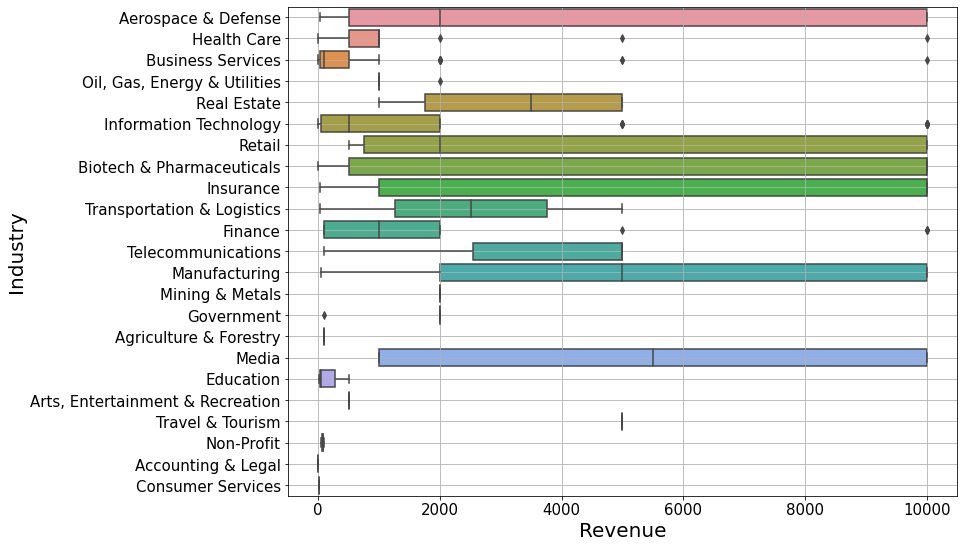

In [40]:
plt.figure(figsize=(12,9))
sns.boxplot(data=job_info,x="Revenue(In mil)", y="Industry")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.xlabel('Revenue',fontsize=20)
plt.ylabel('Industry',fontsize=20)
plt.show()

In [41]:
i = job_info.loc[(job_info['Industry'] == 'Health Care') & (job_info['Revenue(In mil)'] > 1800)].index
job_info.drop(i,inplace=True)

In [42]:
i = job_info.loc[(job_info['Industry'] == 'Business Services') & (job_info['Revenue(In mil)'] > 1800)].index
job_info.drop(i,inplace=True)

In [43]:
i = job_info.loc[(job_info['Industry'] == 'Oil, Gas, Energy & Utilities') & 
                 (job_info['Revenue(In mil)'] > 1800)].index
job_info.drop(i,inplace=True)

In [44]:
i = job_info.loc[(job_info['Industry'] == 'Information Technology') & (job_info['Revenue(In mil)'] > 1800)].index
job_info.drop(i,inplace=True)

For the 'Health Care', 'Business Services', 'Oil, Gas, Energy & Utilities', and 'Information Technology' industry values, the outliers in the 'Revenue' column were present for values above 1800. This means that there were some observations in the 'Revenue' column with values greater than 1800 that were not consistent with the general trend of the data for those industry values.

In [45]:
i = job_info.loc[(job_info['Industry'] == 'Finance') & (job_info['Revenue(In mil)'] > 4000)].index
job_info.drop(i,inplace=True)

For the 'Finance' industry value, the outliers in the 'Revenue' column were present for values above 4000. This means that there were some observations in the 'Revenue' column with values greater than 4000 that were not consistent with the general trend of the data for that industry value.

In [46]:
i = job_info.loc[(job_info['Industry'] == 'Government') & (job_info['Revenue(In mil)'] < 2000)].index
job_info.drop(i,inplace=True)

For the 'Government' industry value, the outliers in the 'Revenue' column were present for values below 2000. This means that there were some observations in the 'Revenue' column with values less than 2000 that were not consistent with the general trend of the data for that industry value.

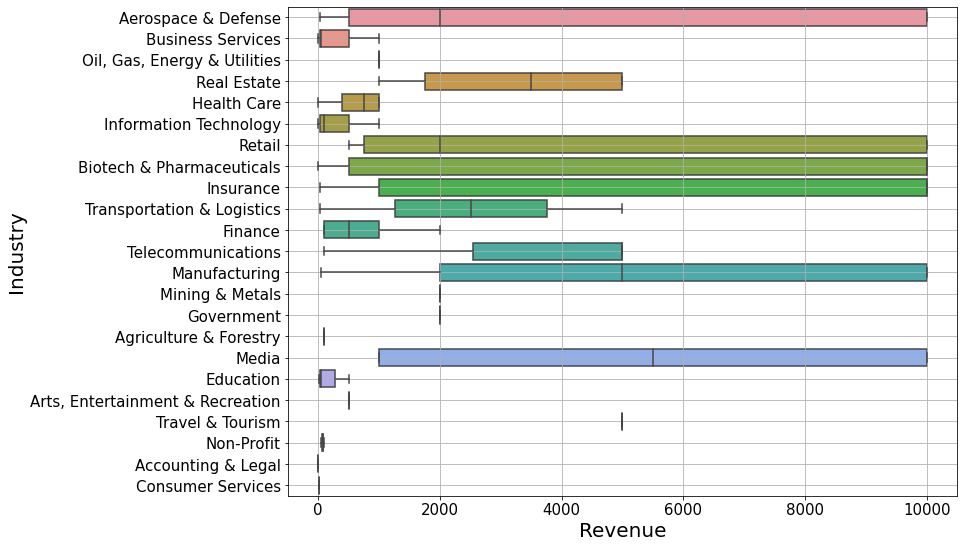

In [47]:
plt.figure(figsize=(12,9))
sns.boxplot(data=job_info,x="Revenue(In mil)", y="Industry")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.xlabel('Revenue',fontsize=20)
plt.ylabel('Industry',fontsize=20)
plt.show()

In [48]:
job_info.shape

(291, 9)

### Q.6) What is the top 5 highly compensated jobs within the government sector?

In [49]:
max_gov_salary = df.loc[
    (df['Industry'] == 'Government')
][['Job_Title','Industry','Revenue(In mil)','Rating','Estimated_Avg_Salary(In 1000k)']]
jobs = max_gov_salary.sort_values('Estimated_Avg_Salary(In 1000k)',ascending=False).reset_index()
jobs = jobs.drop(columns='index')
jobs

,Job_Title,Industry,Revenue(In mil),Rating,Estimated_Avg_Salary(In 1000k)
0,Data Scientist,Government,2000,3.2,97
1,Research Scientist – Security and Privacy,Government,100,3.6,93
2,Associate Data Scientist/Computer Scientist,Government,2000,3.2,81
3,Senior Data Science Systems Engineer,Government,2000,3.2,77
4,Data Scientist - Systems Engineering,Government,2000,3.2,69


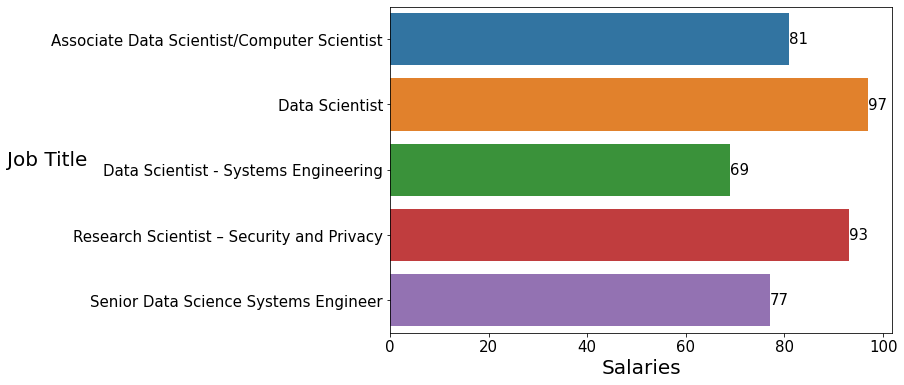

In [50]:
df_gov = df.loc[df['Industry'] == 'Government']
df_gov = df_gov.groupby('Job_Title')['Estimated_Avg_Salary(In 1000k)'].mean()
df_gov = df_gov.reset_index()

plt.figure(figsize=(9,6))
ax = sns.barplot(x=df_gov['Estimated_Avg_Salary(In 1000k)'], y=df_gov.Job_Title)
for i in ax.containers:
    ax.bar_label(i,fontsize=15)
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15,rotation=0)
plt.xlabel('Salaries',fontsize=20)
plt.ylabel('Job Title',fontsize=20,rotation=0)
plt.show()

### Q.7) How many companies are seeking employees with expertise in either Python or R, and knowledge of Spark, AWS, and Excel as these technologies are popularly used in data analysis, machine learning and big data processing?

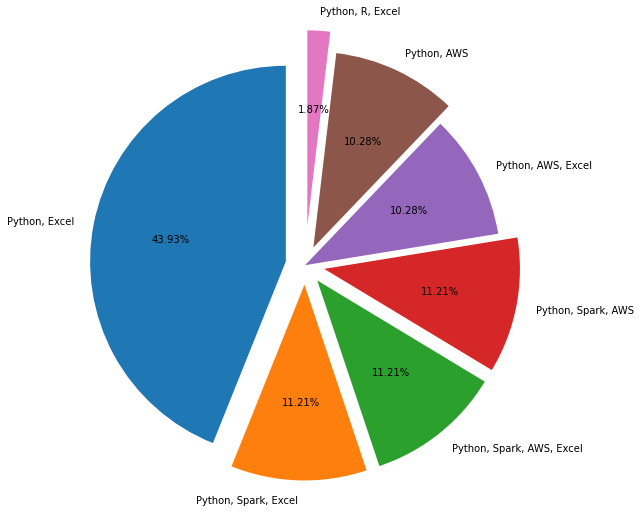

In [51]:
job_info_python_r = job_info[['Company_Name',
                  'Job_Title',
          'Headquarters',
          'Industry',
          'Estimated_Avg_Salary(In 1000k)',
              'Required_Skills']]
job_info_req = job_info_python_r.loc[job_info['Required_Skills'].str.contains('Python|R',na = False)]

job_info_req = job_info_req.loc[job_info['Required_Skills'].str.contains('Sparks|AWS|Excel',na = False)]

x = job_info_req.Required_Skills.value_counts().reset_index()['index']

plt.figure(figsize=(12,9))
ax =job_info_req.Required_Skills.value_counts().plot.pie(labels=x,
                                                   autopct='%1.2f%%',
                                                   startangle=90,
                                                   shadow=False,
                                                   explode=(0.1,0.1,0.1,0.1,0,0.1,0.2))
ax.yaxis.set_visible(False)
plt.show()

### Q.8) Which companies have a rating of 3.8 or more, a workforce of more than 5000 employees and revenue exceeding 1 billion dollars?

In [52]:
medical_industries = ['Biotech & Pharmaceuticals', 'Health Care']
df_med = job_info.loc[(job_info['Industry'].isin(medical_industries)) & 
                (job_info['Rating'] >= 3.8)]
df_med = df_med.loc[(df_med['Company_Size(max. 10000)'] > 5000) & 
                    (df_med['Revenue(In mil)'] > 1000)]

df_med.sort_values('Estimated_Avg_Salary(In 1000k)',
                   ascending=False,inplace=True)
df_med = df_med.reset_index()
df_med.drop(columns=['index','Company_Name'],inplace=True)

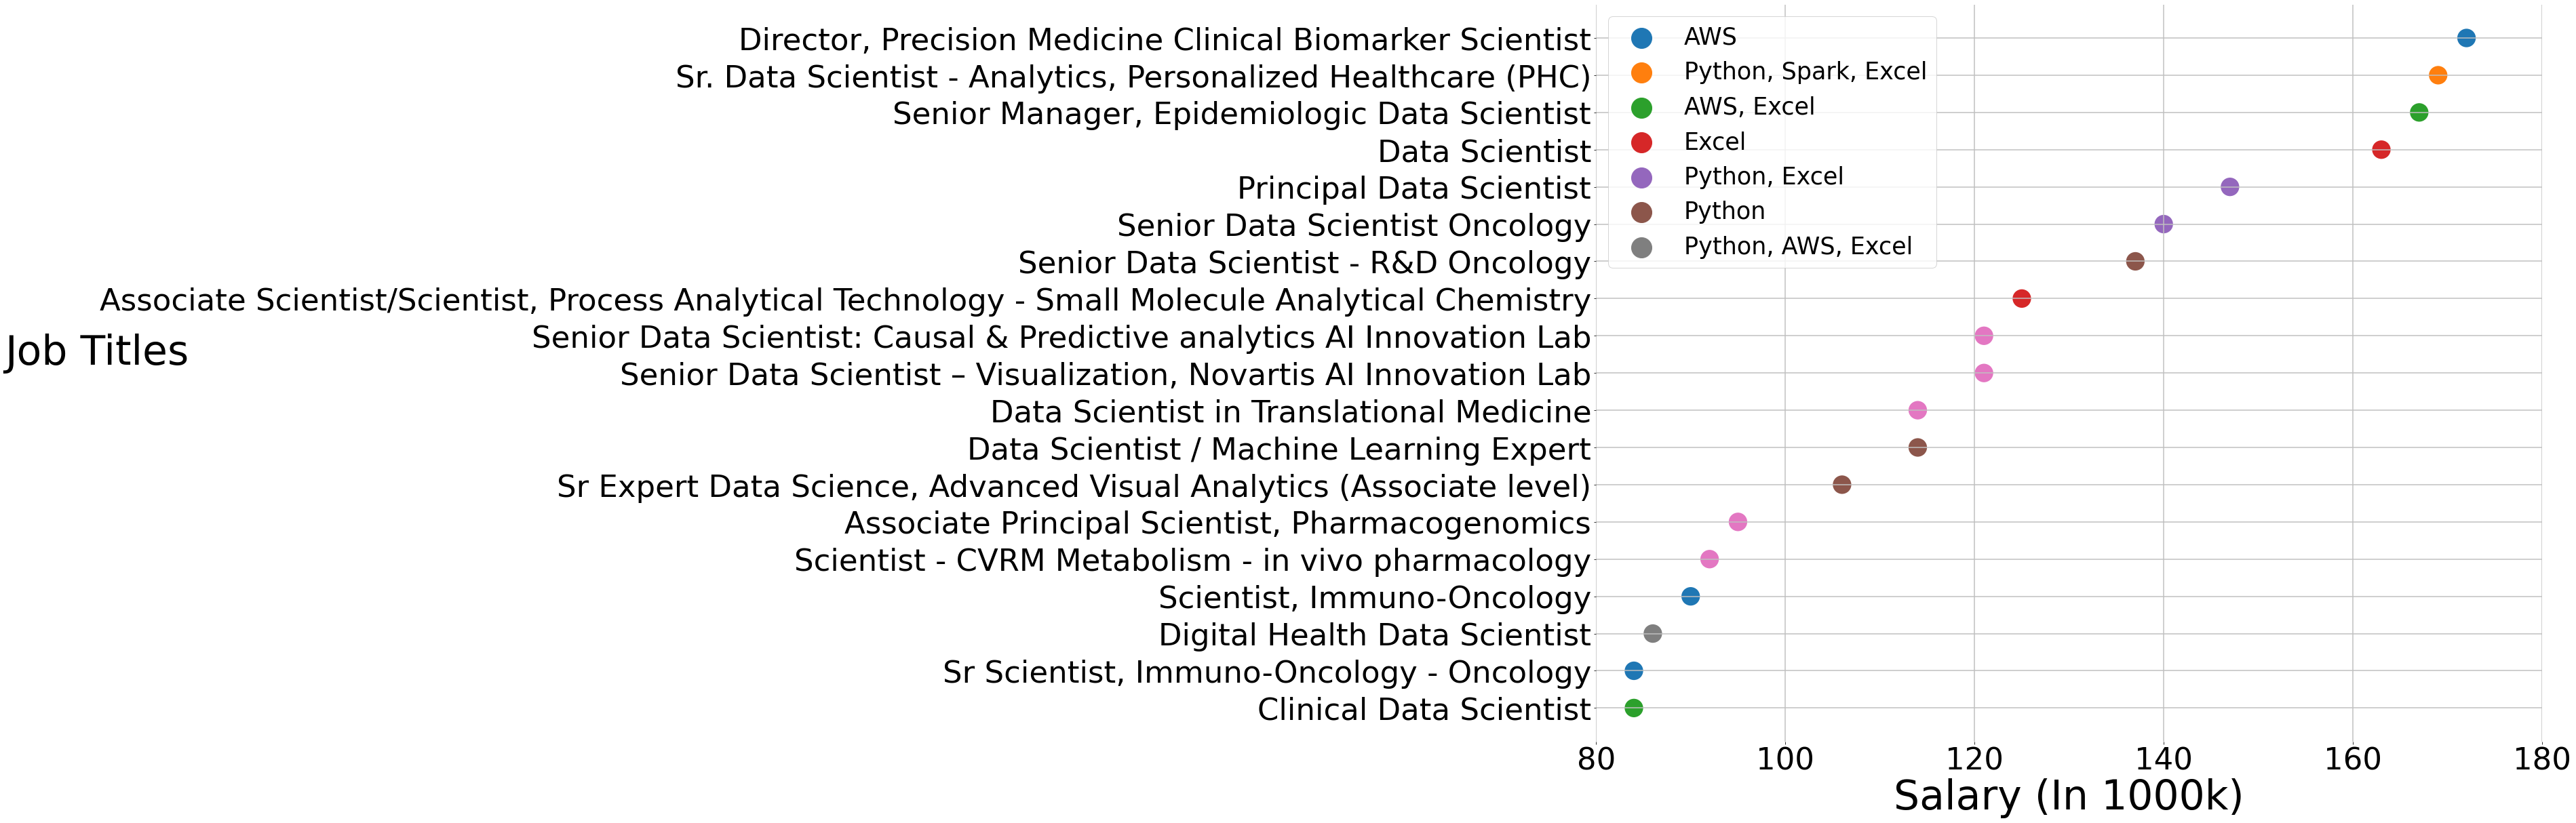

In [53]:
plt.figure(figsize=(25,20))
ax = sns.scatterplot(y=df_med['Job_Title'],
                     x=df_med['Estimated_Avg_Salary(In 1000k)'],
                     marker='o',hue=df_med.Required_Skills,s=880)
for i in ax.containers:
    ax.bar_label(i,fontsize=38)
plt.legend(fontsize=35,markerscale=5.0)
plt.xlim(80,180)
plt.xlabel('Salary (In 1000k)',fontsize=60)
plt.ylabel('Job Titles',fontsize=60,rotation=0)
plt.xticks(fontsize=45,rotation=0)
plt.yticks(fontsize=45)
plt.grid(lw=1.5,color='silver')
sns.despine(left=True, bottom=True)
plt.show()

### Q.9) Which are the top 10 companies by revenue within a specific industry?

In [54]:
df_industry = df.loc[df['Industry'] == 'Finance']
df_industry = df_industry.groupby(['Company_Name','Headquarters'])['Revenue(In mil)'].sum()
top_10_companies = df_industry.nlargest(10, keep='first')
top_10_companies = top_10_companies.reset_index()
top_10_companies

,Company_Name,Headquarters,Revenue(In mil)
0,Citi,New York,10000
1,OceanFirst Financial,Toms River,10000
2,Santander,Madrid,10000
3,FLEETCOR,Peachtree Corners,5000
4,TransUnion,Chicago,4000
5,Associated Banc-Corp,Green Bay,2000
6,DTCC,New York,2000
7,PennyMac,Westlake Village,2000
8,Cboe Global Markets,Chicago,1000
9,Biz2Credit Inc,New York,500


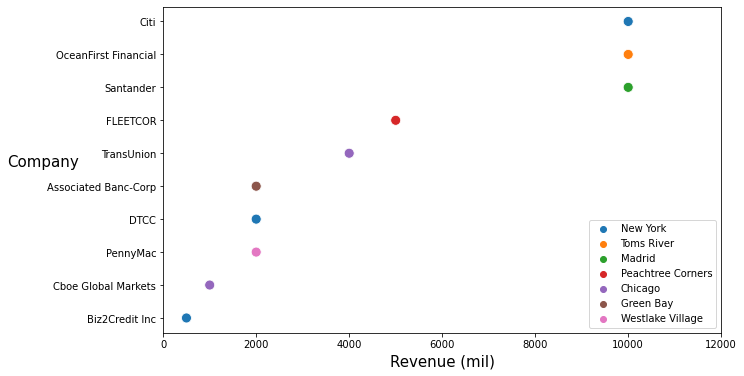

In [55]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=top_10_companies,y="Company_Name",x="Revenue(In mil)",hue="Headquarters",marker='o',s=100)
plt.xlabel('Revenue (mil)',fontsize=15,rotation=0)
plt.ylabel('Company',fontsize=15,rotation=0)
ax.set_xticks(ax.get_xticks()[::1])
plt.legend(loc='lower right')
sns.color_palette("dark")
plt.show()

### Q.10) What is the highest salary within each industry in the given dataframe?

In [56]:
h_sal = job_info.groupby(['Industry'])['Estimated_Avg_Salary(In 1000k)'].max().sort_values(ascending=False).reset_index()
h_sal

,Industry,Estimated_Avg_Salary(In 1000k)
0,Insurance,254
1,Information Technology,225
2,Finance,180
3,Biotech & Pharmaceuticals,174
4,Aerospace & Defense,173
5,Business Services,167
6,Retail,163
7,Telecommunications,142
8,Consumer Services,139
9,Real Estate,130


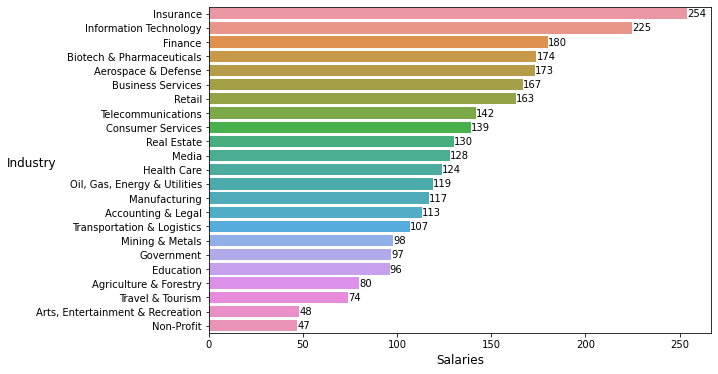

In [57]:
plt.figure(figsize=(9,6))
ax = sns.barplot(data = h_sal, x='Estimated_Avg_Salary(In 1000k)', y='Industry')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.xticks(fontsize=10,rotation=0)
plt.yticks(fontsize=10,rotation=0)
plt.xlabel('Salaries',fontsize=12,rotation=0)
plt.ylabel('Industry',fontsize=12,rotation=0)
plt.show()

### Q. 11) What can be inferred from the distribution of estimated average salaries for jobs at different companies when using a distplot to visualize the 'Estimated_Avg_Salary(In 1000k)' column of my dataframe?

A distplot can be used to visualize the distribution of the 'Estimated_Avg_Salary(In 1000k)' column in a dataframe containing job listings or company information. The x-axis would represent the salary range in thousands of dollars, while the y-axis represents the frequency or density of the data. The distplot would show the number of jobs with a certain estimated average salary.


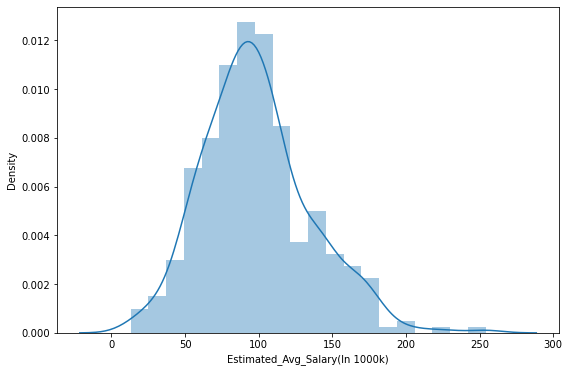

In [58]:
plt.figure(figsize=(9,6))
sns.distplot(df['Estimated_Avg_Salary(In 1000k)'])
plt.show()

From the distplot, one can infer the overall shape of the data distribution, such as if there is a peak or central tendency around which most of the data is concentrated, or if the data is spread out over a wide range of values. Additionally, one can identify any outliers in the data.

It is important to note that the interpretation of the distplot will be affected by the data cleaning, transformation and preprocessing that might have been done on the data.

### Q. 12) "What is the skewness of the 'Estimated_Avg_Salary', 'Revenue', 'Company_Size', and 'Rating' columns in the dataframe, and how does it affect the shape of their respective probability density functions?"

In [59]:
num_col = job_info.select_dtypes(['int64','float64'])

Rating:


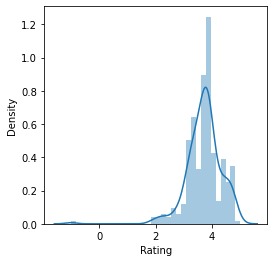

Rating has a skewness value of -1.7266179109674875.


Company_Size(max. 10000):


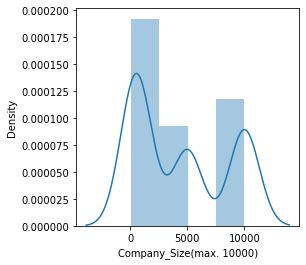

Company_Size(max. 10000) has a skewness value of 0.4007470770235537.


Revenue(In mil):


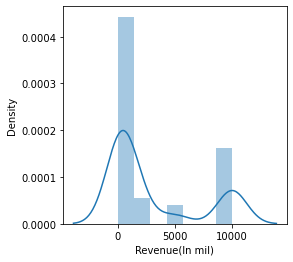

Revenue(In mil) has a skewness value of 1.0552317291995408.


Estimated_Avg_Salary(In 1000k):


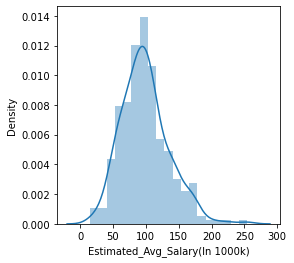

Estimated_Avg_Salary(In 1000k) has a skewness value of 0.6955661542792905.




In [60]:
k = 0
for i,v in enumerate(num_col):
    print(str(v)+':')    
    plt.figure(figsize=(4,4))
    sns.distplot(num_col[v])
    plt.show()
    
    print(f"{v} has a skewness value of {skew(num_col[v])}.")
    print('\n')

A positive skewness value indicates that the tail on the right side of the probability distribution is longer or fatter, while a negative skewness value indicates that the tail of the left side of the probability distribution is longer or fatter. A zero skewness value indicates that the probability distribution is symmetric.

* Estimated_Avg_Salary(In 1000k) has a skewness of 0.6955661542792905
* Revenue(In mil) has a skewness of 1.0552317291995408
* Company_Size(max. 10000) has a skewness of 0.4007470770235537
* Rating has a skewness of -1.7266179109674875

A positive skewness value means that the distribution has a long right tail, the data is concentrated on the left side of the distribution and goes out to the right. A negative skewness value means the distribution has a long left tail, the data is concentrated on the right side of the distribution and goes out to the left.

### Q. 13) Can you identify companies that do not have any specified required skills and create a bar plot of their estimated salaries?

In [61]:
no_skill = job_info.loc[job_info.Required_Skills == '']

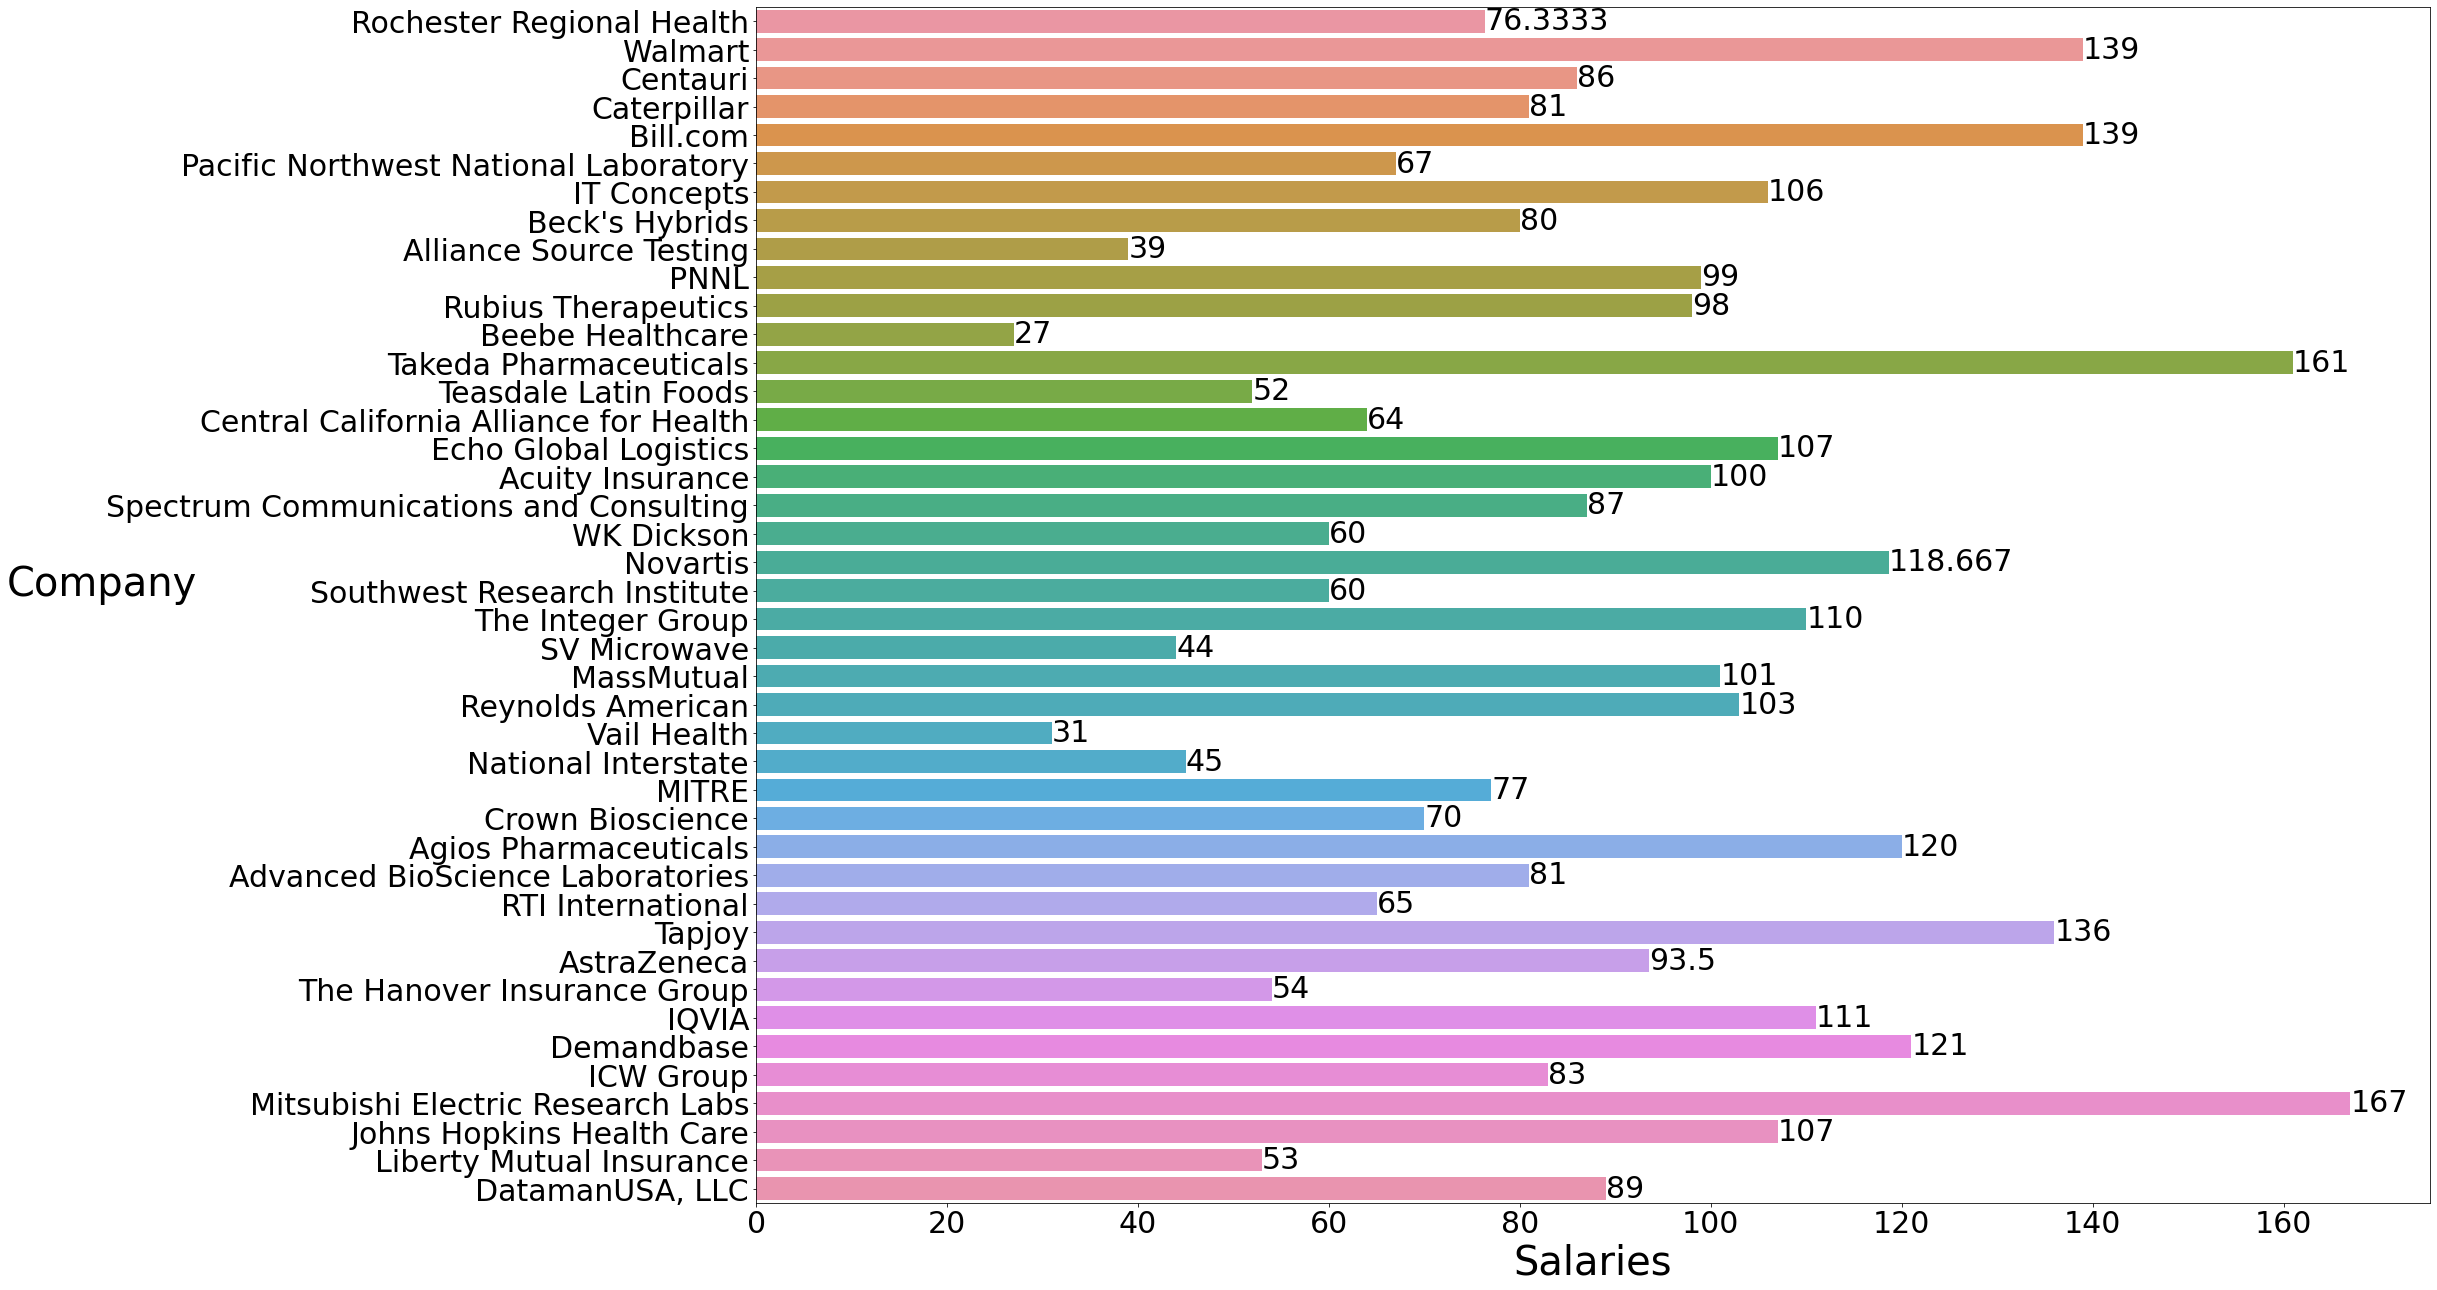

In [62]:
plt.figure(figsize=(30,22))
ax = sns.barplot(x=no_skill['Estimated_Avg_Salary(In 1000k)'], 
                 y=no_skill.Company_Name, ci=None)
for i in ax.containers:
    ax.bar_label(i,fontsize=30)
plt.xticks(fontsize=30,rotation=0)
plt.yticks(fontsize=30,rotation=0)
plt.xlabel('Salaries',fontsize=40)
plt.ylabel('Company',fontsize=40,rotation=0)
plt.show()

### Q. 14) What is the method to calculate and visualize the correlation between all the numerical columns in a dataset?

In [63]:
corr = job_info.corr()
corr

,Rating,Company_Size(max. 10000),Revenue(In mil),Estimated_Avg_Salary(In 1000k)
Rating,1.000000,-0.144372,-0.111470,-0.040560
Company_Size(max. 10000),-0.144372,1.000000,0.826292,0.132203
Revenue(In mil),-0.111470,0.826292,1.000000,0.189520
Estimated_Avg_Salary(In 1000k),-0.040560,0.132203,0.189520,1.000000


This is a correlation matrix, which shows the correlation coefficients between the four variables: "Rating", "Company_Size", "Revenue", and "Estimated_Avg_Salary". Each row and column in the matrix represents one of the variables, and the values in the matrix are the correlation coefficients between the corresponding variables.

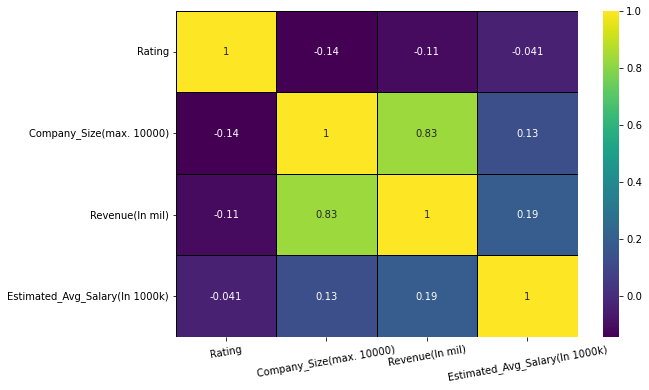

In [64]:
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True,lw=1,linecolor='black',cmap='viridis')
plt.xticks(rotation=10)
plt.show()

A correlation coefficient is a value between -1 and 1 that measures the strength and direction of a linear relationship between two variables. A coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases. A coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases. A coefficient of 0 indicates no correlation.

In this correlation matrix, it can be seen that the variables "Company_Size" and "Revenue" have a positive correlation, with a coefficient of 0.826292. This means that as company size increases, revenue also increases. It can also be seen that the variables "Rating" and "Estimated_Avg_Salary" have a negative correlation, with a coefficient of -0.040560. This means that as the rating decreases the estimated average salary also decreases.